In [79]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GMM
from sklearn.decomposition import PCA

In [14]:
train_filedata = np.genfromtxt('train.csv', skip_header=1, delimiter=',', dtype=int)

train_labels = train_filedata[:,train_filedata.shape[1] - 1]
train_data = train_filedata[:, 1:train_filedata.shape[1] - 1]

test_filedata = np.genfromtxt('test.csv', skip_header=1, delimiter=',', dtype=int)
test_data = test_filedata[:, 1:test_filedata.shape[1]]

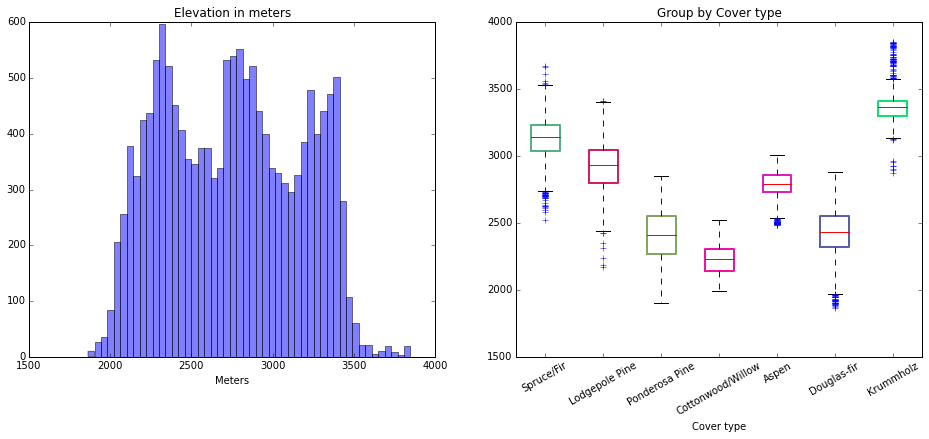

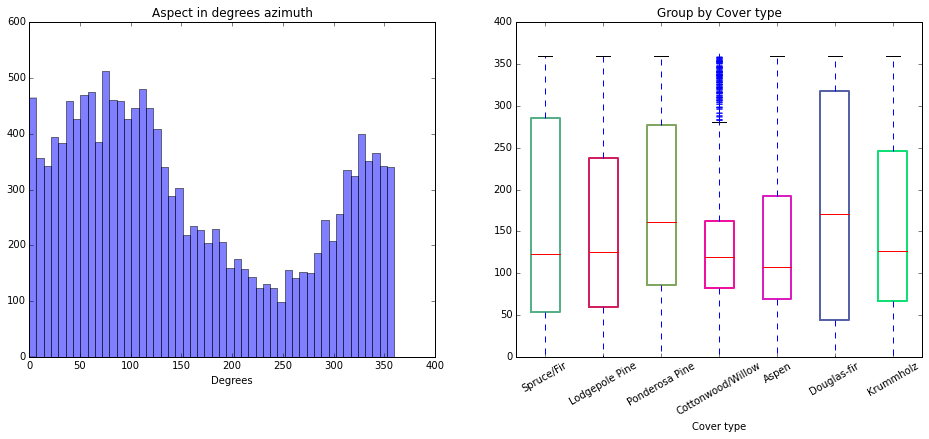

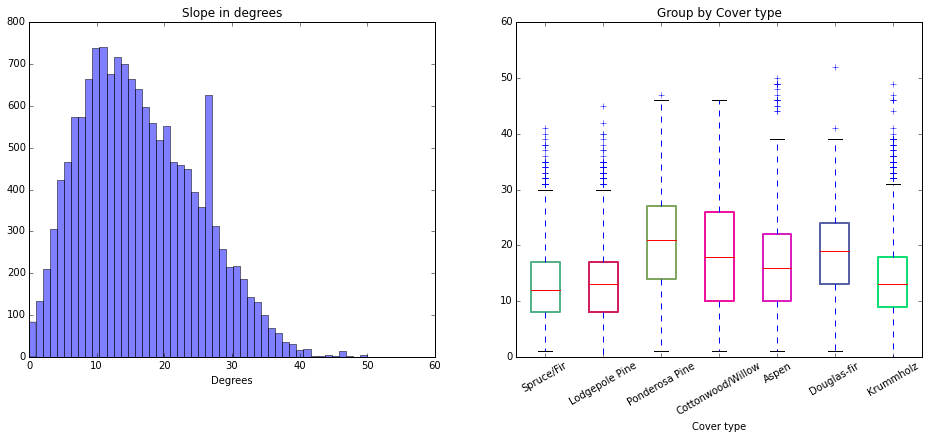

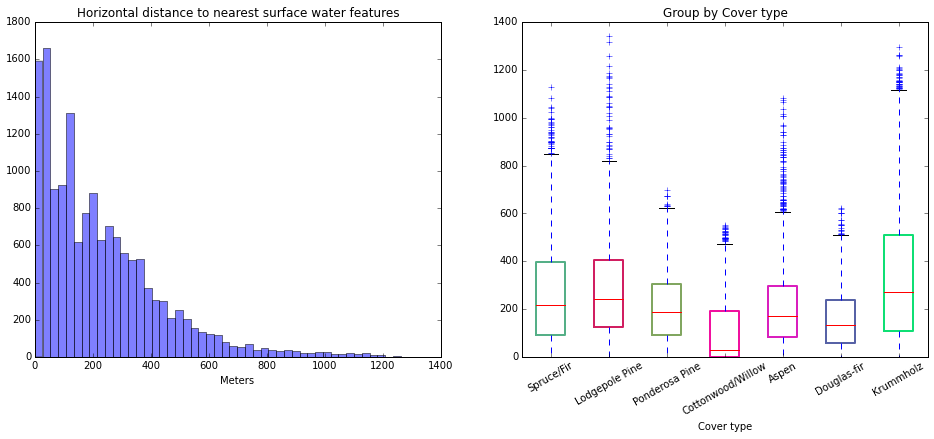

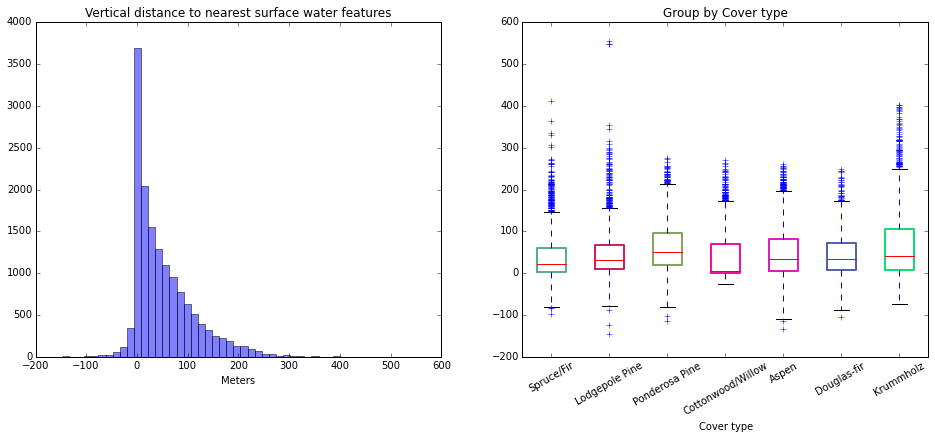

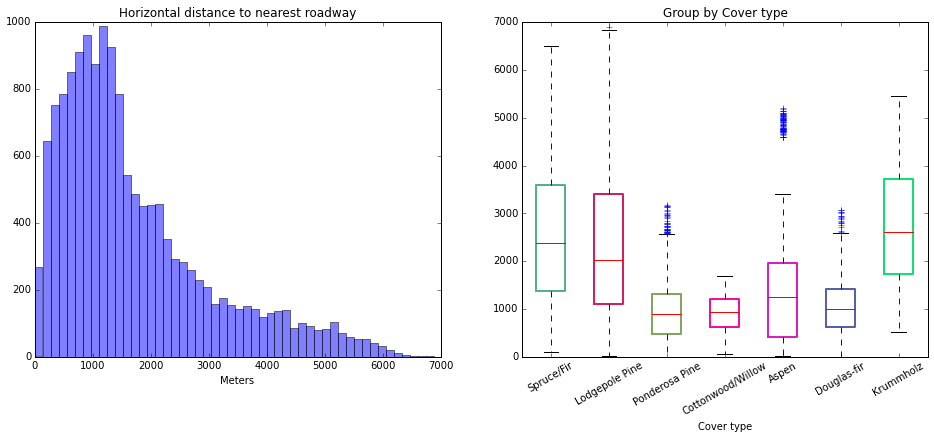

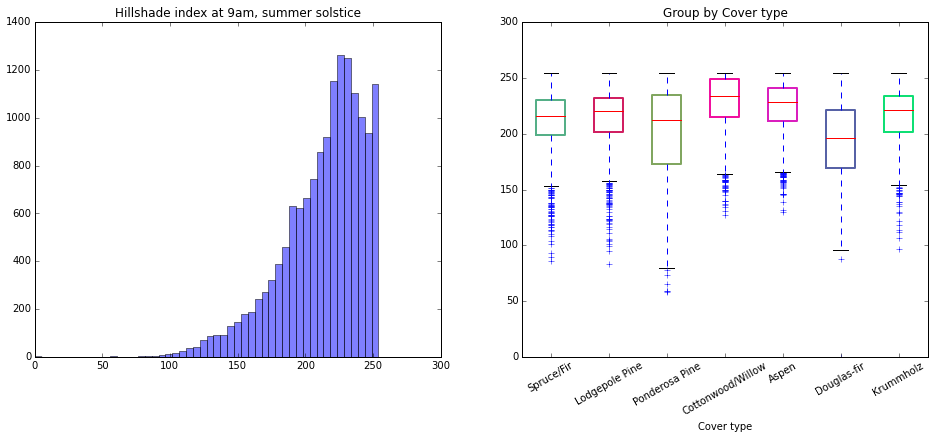

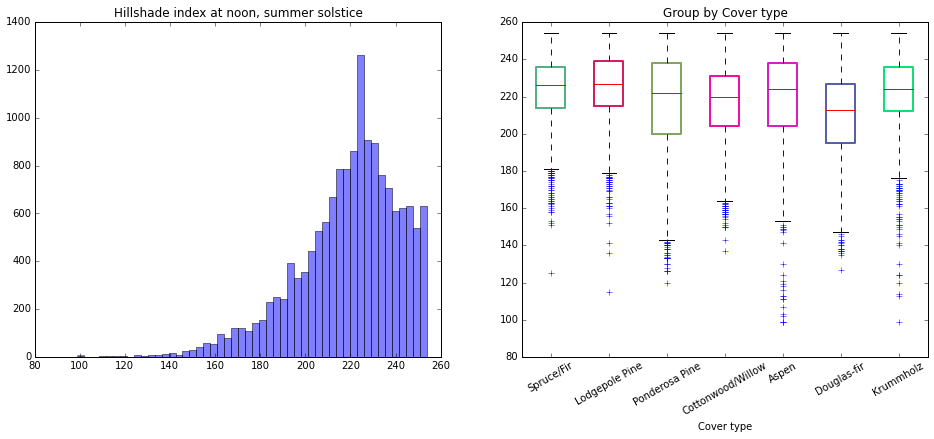

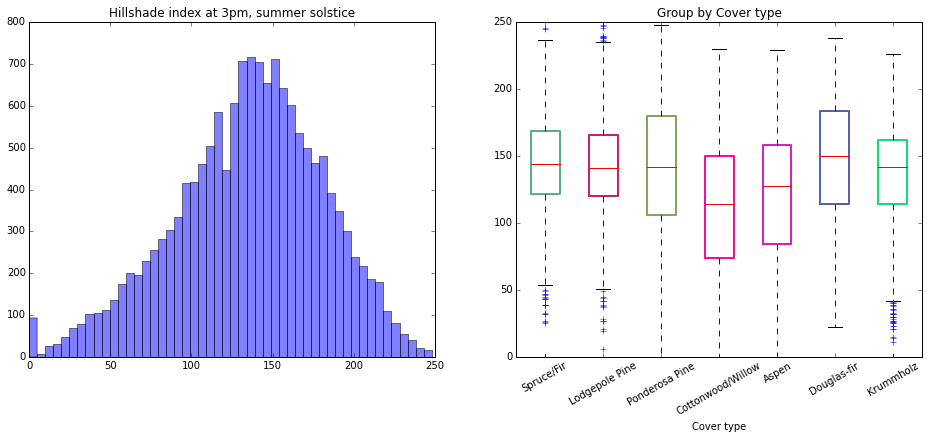

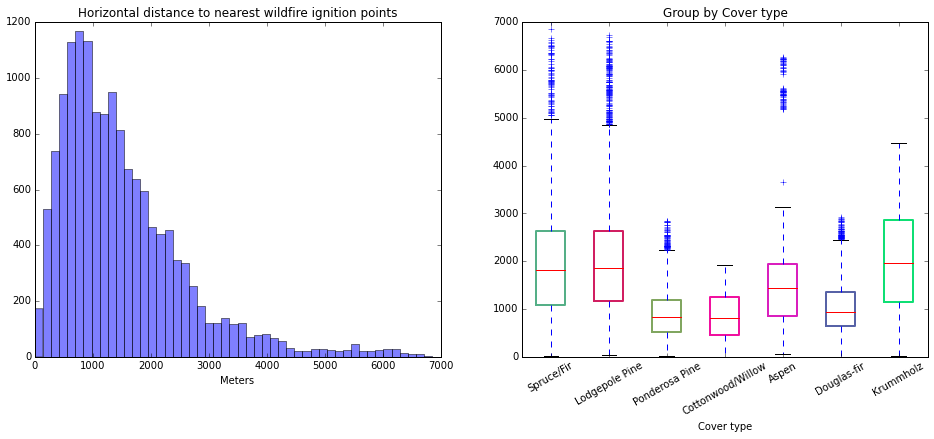

In [190]:
# Visualizing data distributions - Plotting histograms

cover_type = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
random_colors = np.random.rand(7, 3)

def plot_histogram(ax, data, title, xlab):
    ax.hist(data, bins=50, alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel(xlab)

# Aspect and Cover type
def plot_class_wise_data(ax, data, labels):
    boxplotdata = list()
    for classes in range(1, 8):
        sub_data = data[np.where(labels == classes)]
        boxplotdata.append(sub_data)

    bp = ax.boxplot(boxplotdata)
    ax.set_xlabel('Cover type')
    ax.set_title('Group by Cover type')
    ax.set_xticklabels(cover_type, rotation=30)

    for i, box in enumerate(bp['boxes']):
        box.set(color=random_colors[i,:], linewidth=2)

def plotter(data, labels, title_1, x_label_1):
    fig = plt.figure(figsize=(16, 6))
    ax1 = fig.add_subplot(1, 2, 1)
    plot_histogram(ax1, data, title_1, x_label_1)
    ax2 = fig.add_subplot(1, 2, 2)
    plot_class_wise_data(ax2, data, labels)

# Elevation
title_1 = 'Elevation in meters'
x_label_1 = 'Meters'
data = train_data[:,0]
plotter(data, train_labels, title_1, x_label_1)

# Aspect
title_1 = 'Aspect in degrees azimuth'
x_label_1 = 'Degrees'
data = train_data[:,1]
plotter(data, train_labels, title_1, x_label_1)

# Slope in degrees
title_1 = 'Slope in degrees'
x_label_1 = 'Degrees'
data = train_data[:,2]
plotter(data, train_labels, title_1, x_label_1)

# Horizontal_Distance_To_Hydrology
title_1 = 'Horizontal distance to nearest surface water features'
x_label_1 = 'Meters'
data = train_data[:,3]
plotter(data, train_labels, title_1, x_label_1)

# Vertical_Distance_To_Hydrology
title_1 = 'Vertical distance to nearest surface water features'
x_label_1 = 'Meters'
data = train_data[:,4]
plotter(data, train_labels, title_1, x_label_1)

# Horizontal_Distance_To_Roadways
title_1 = 'Horizontal distance to nearest roadway'
x_label_1 = 'Meters'
data = train_data[:,5]
plotter(data, train_labels, title_1, x_label_1)

# Hillshade_9am
title_1 = 'Hillshade index at 9am, summer solstice'
x_label_1 = ''
data = train_data[:,6]
plotter(data, train_labels, title_1, x_label_1)

# Hillshade_Noon
title_1 = 'Hillshade index at noon, summer solstice'
x_label_1 = ''
data = train_data[:,7]
plotter(data, train_labels, title_1, x_label_1)

# Hillshade_3pm
title_1 = 'Hillshade index at 3pm, summer solstice'
x_label_1 = ''
data = train_data[:,8]
plotter(data, train_labels, title_1, x_label_1)

# Horizontal_Distance_To_Fire_Points
title_1 = 'Horizontal distance to nearest wildfire ignition points'
x_label_1 = 'Meters'
data = train_data[:,9]
plotter(data, train_labels, title_1, x_label_1)

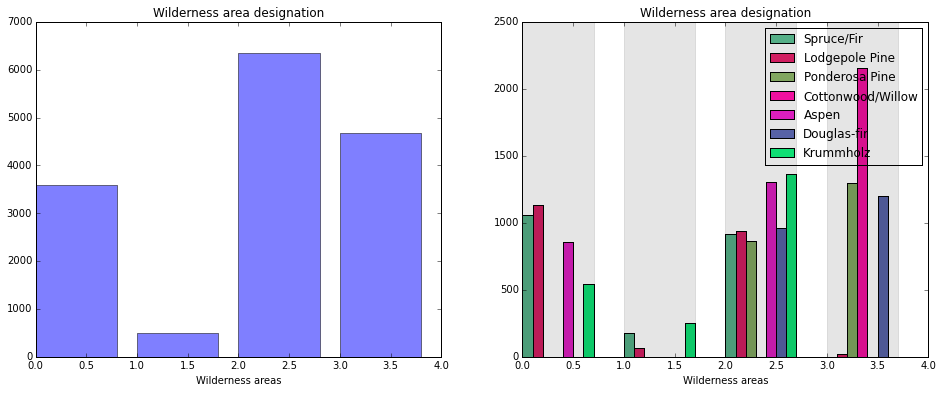

In [191]:
wilderness_area_names = ['Rawah', 'Neota', 'Comanche Peak', 'Cache la Poudre']

fig = plt.figure(figsize=(16, 6))

# Wilderness_Area
wilderness_areas = np.sum(train_data[:,10:14], axis=0)
ax = fig.add_subplot(1, 2, 1)
dummy = ax.bar(np.arange(4), wilderness_areas, alpha=0.5)
dummy = ax.set_title("Wilderness area designation")
dummy = ax.set_xlabel('Wilderness areas')
#dummy = ax.set_xticklabels(wilderness_area_names,rotation=30)

# Wilderness_Area per cover type
ax = fig.add_subplot(1, 2, 2)

ind = np.arange(4)
width = 0.1
for i in range(1, 8):
    wilderness_areas = np.sum(train_data[np.where(train_labels==i),10:14][0], axis=0)
    bar = ax.bar(ind, wilderness_areas, width=width, color=random_colors[i-1,:])
    ind = ind + width
    dummy = ax.set_title("Wilderness area designation")
    dummy = ax.set_xlabel('Wilderness areas')
    ax.legend(cover_type)
dummy = ax.set_xlim(0, 4)
bar = ax.bar(np.arange(4), [2500, 2500, 2500, 2500], width=(width*7), color='black', alpha=0.1)
#dummy = ax.set_xticklabels(wilderness_area_names,rotation=30)

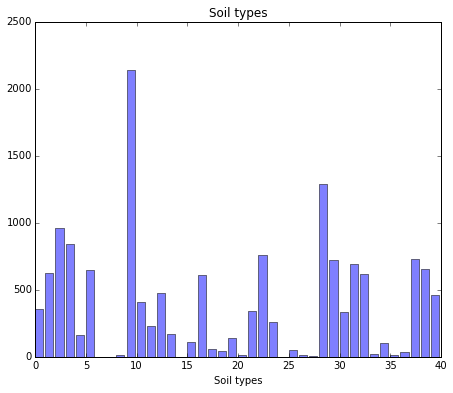

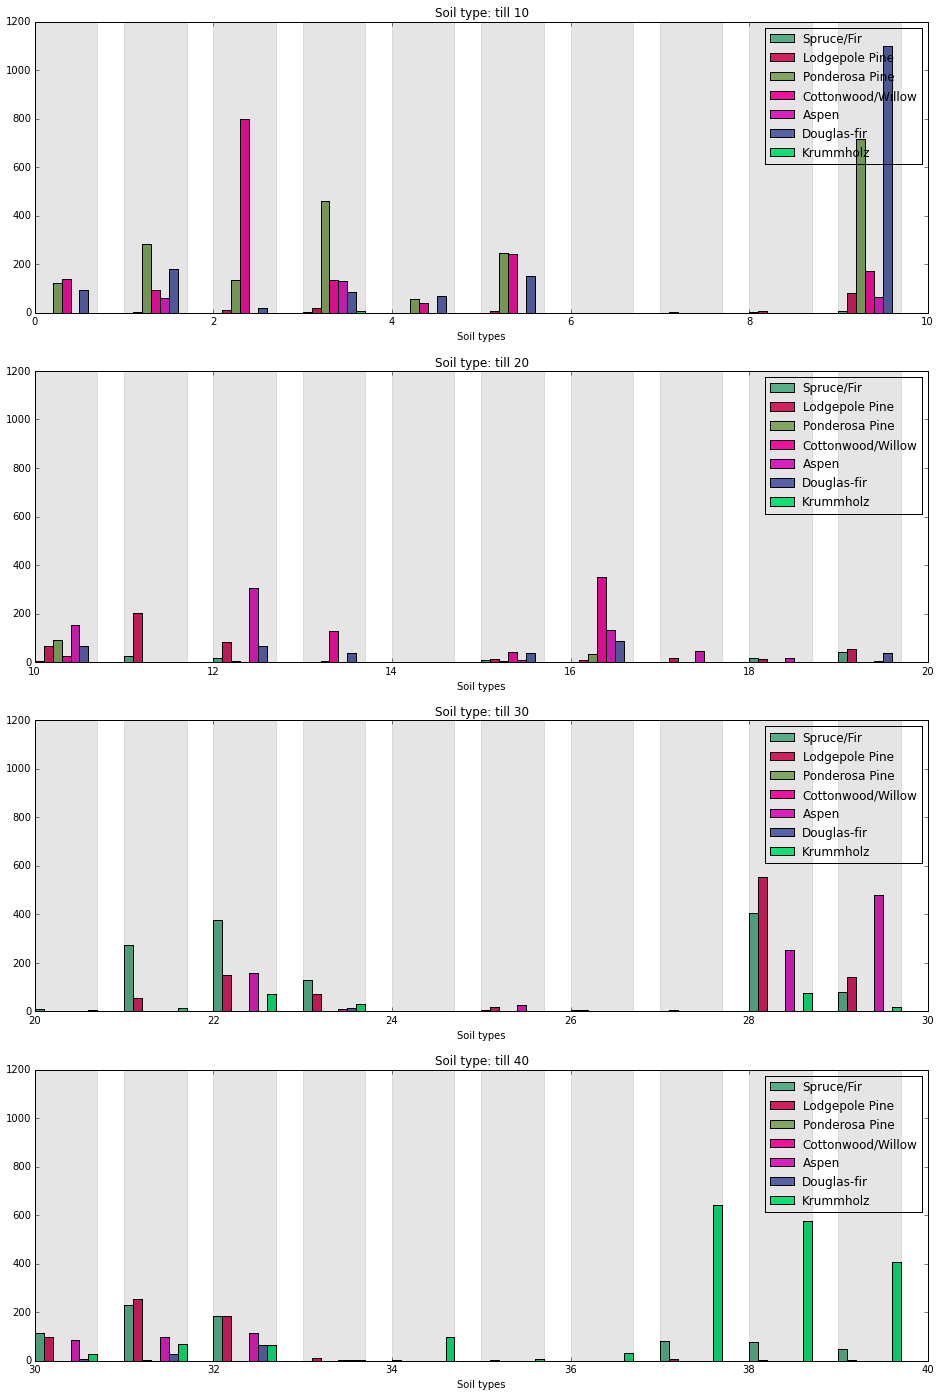

In [219]:
# Soil_Type
fig = plt.figure(figsize=(16, 6))
soil_type = np.sum(train_data[:,14:55], axis=0)
ax = fig.add_subplot(1, 2, 1)
dummy = ax.bar(np.arange(40), soil_type, alpha=0.5)
dummy = ax.set_title("Soil types")
dummy = ax.set_xlabel('Soil types')

# Soil type per cover type
fig = plt.figure(figsize=(16, 24))

for j in range(4):
    ax = fig.add_subplot(4, 1, j+1)
    dummy = ax.set_title("Soil type per cover type")
    ind = np.arange(10*j, 10*j+10)
    width = 0.1
    for i in range(1, 8):
        soil_type = np.sum(train_data[np.where(train_labels==i),((j+1)*10)+4:((j+1)*10)+14][0], axis=0)
        bar = ax.bar(ind, soil_type, width=width, color=random_colors[i-1,:])
        ind = ind + width
        title = "Soil type: till " + str((j+1) * 10)
        dummy = ax.set_title(title)
        dummy = ax.set_xlabel('Soil types')
        ax.legend(cover_type)
    bar = ax.bar(np.arange(10*j, 10*j+10), [1200]*10, width=(width*7), color='black', alpha=0.1)


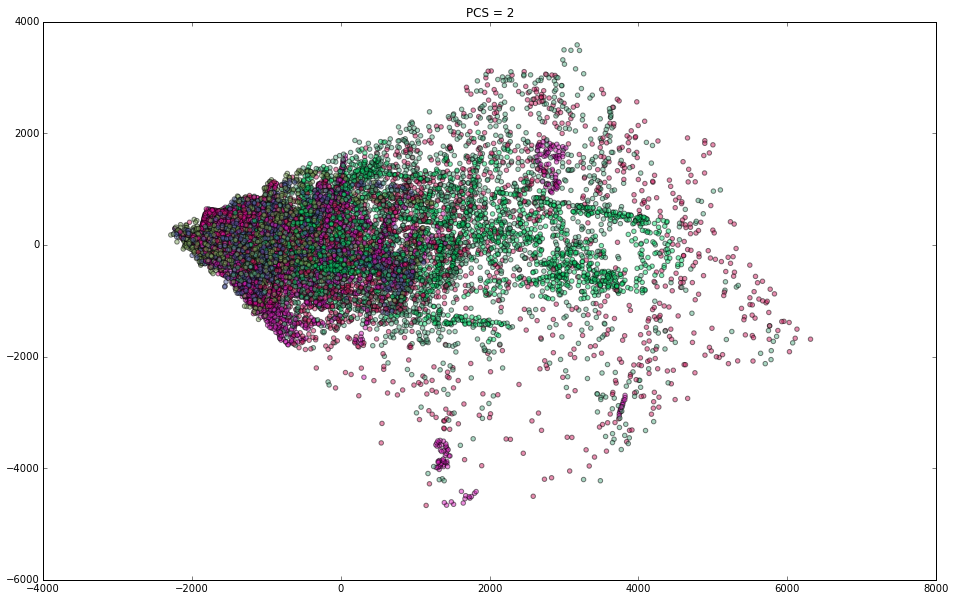

In [195]:
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(train_data)

colors = np.zeros((train_data.shape[0], 3))
for i in range(colors.shape[0]):
    colors[i,] = random_colors[train_labels[i]-1]

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1)
dummy = ax.scatter(transformed_data[:,0], transformed_data[:,1], c=colors, alpha=0.5)
dummy = ax.set_title("PCS = 2")